# Brownian motion for Financial Math

 based on https://www.youtube.com/watch?v=fIM_AQbBOm4&t=11s

 Brownian motion is a martingale and it accumulates quadratic variation at rate one per unit time.

In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Brownian motion

Brownian motion is a stochastic process ${W_t}$, with:
- $W_0 = 0$
- $W$ has independent increments - $W$ is a Martingale.
- $W$ has Gaussian increments
- $W$ has continuous simple paths (almost surely)

### Symmetric Random Walk

Each step is an independent RV:
$$X_j = \begin{cases} 1 & \text{with probability } \frac{1}{2} ~,\\ -1 & \text{with probability } \frac{1}{2} ~.\end{cases}$$

Then, defining $M_0 = 0$, the symmetric random walk is:
$$M_k = \sum_{j=1}^k X_j~.$$

In [2]:
# Parameters
M = 10 # number of random walks
t = 10 # time period for each random walk

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T # matrix of +1/-1's for each step
origin = np.zeros((1,M)) # origin for each random walk
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0) # cummulative sum of the steps

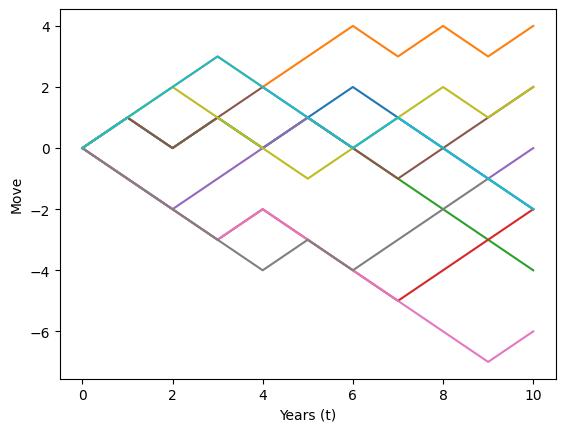

In [3]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [5]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
[quadratic_variation(path) for path in rw_paths.T[:4]]


[10.0, 10.0, 10.0, 10.0]

In [6]:
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_paths[1:11]]

[0.96, 2.76, 5.0, 3.56, 4.16, 6.44, 6.76, 7.36, 6.76, 8.2]

To approximate a Brownian motion, we can speed up time and scale down step size:
$$W^{(n)}(t) = \frac{1}{\sqrt{n}} M_{nt}~.$$

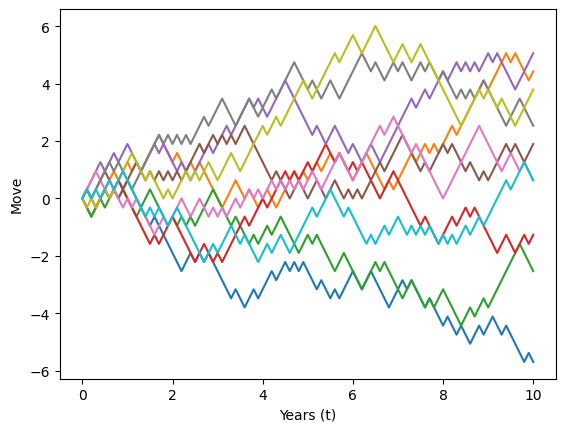

In [8]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


In [9]:
# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]


[0.096, 0.196, 0.244, 0.18, 0.144, 0.224, 0.176, 0.196, 0.26, 0.356]

In [10]:
[quadratic_variation(path) for path in srw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

### Limit of Binomial Distribution

As n increases, the binomial distribution converges to the normal distribution with variance t.

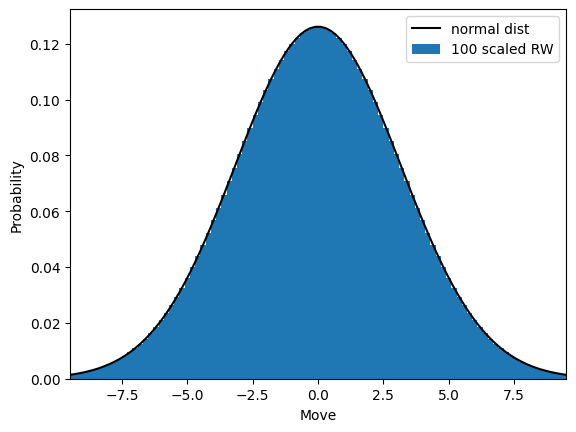

In [12]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 100
t = 10

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0], 
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

### Brownian motion at last

That is, the previous analysis shows:
$$\lim_{n\to \infty} W^{(n)}(t) \sim N(0,t)~. $$

Now, a Brownian motion is a stochastic process $W$, such that:
$$W_t \sim N(0,t)~,$$
for all $t$. Let us look at it below.

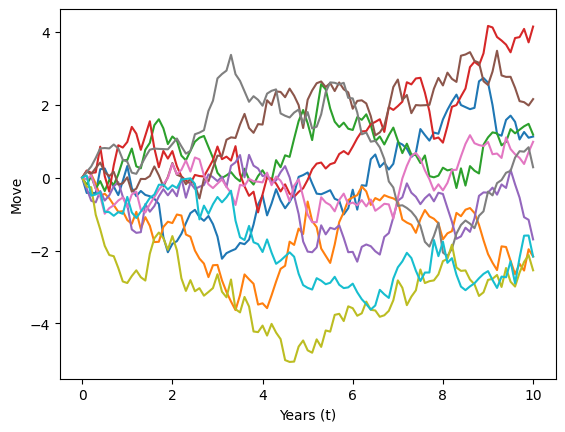

In [13]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [14]:
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

[10.675, 9.857, 9.639, 11.386]

In [15]:
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]

[0.048, 0.091, 0.19, 0.432, 0.525, 0.536, 0.642, 0.843, 0.987, 1.116]

# Geometric Brownian motion

Geometric Brownian motion $S$ is defined by $S_0>0$ and the dynamics defined by the following Stochastic Differential equation:
$$dS_t = \mu S_t dt + \sigma S_t dW_t~,$$
with the explicit solution:
$$S_t = S_0 e^{\left( \mu - \frac{\sigma^2}{2}\right)t + \sigma W_t}~.$$

Here $\mu$ is the coefficient for drift, $\sigma$ is the constant volatility, $S$ is the stock price.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Parameters
mu = 0.1 # drift coefficent
n = 100 # number of steps
T = 1 # time in years
M = 100 # number of simulations
S0 = 100 # initial stock price
sigma = 0.3 # volatility

In [19]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma**2 / 2)*dt
    + sigma*np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0*St.cumprod(axis=0)

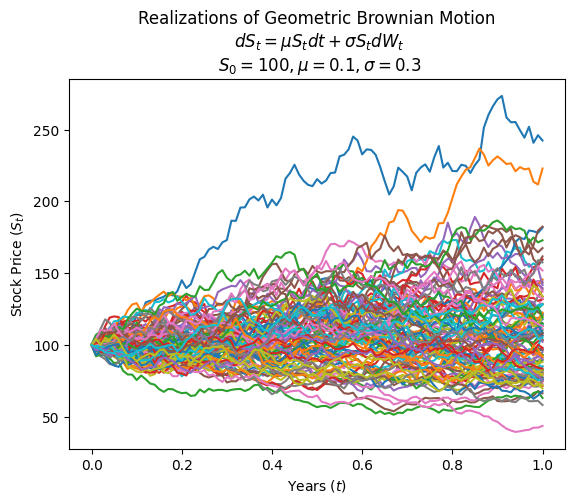

In [20]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()